In [57]:
#First we import the necessary libraries.
#pywt is a wavelet transformation library which I found is easier to apply than manually coding functions up.
from __future__ import print_function
import pywt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

ModuleNotFoundError: No module named 'np'

In [2]:
df1 = pd.read_csv('/Users/andyliu/develop/andy/aapl_indicators_nosplit.csv')
df2 = df1.iloc[:,1:]
df3 = df2.drop(labels=['roc', 'mtm6', 'mtm12'], axis=1)
df1 = df3
df1.head()

,date,open,close,low,high,volume,bb_bbm,bb_bbh,bb_bbl,atr,macd,cci,ema,sma12,sma5,stochastic_oscillator
0,2/8/00,4.0714,4.1027,3.9755,4.1451,0,3.742555,4.258224,3.226886,0.258809,0.028209,108.782044,3.824942,3.819608,3.85050,75.940406
1,2/9/00,4.0804,4.0224,4.0179,4.1786,0,3.778050,4.267487,3.288613,0.251801,0.041007,99.551288,3.851270,3.838583,3.94916,80.342311
2,2/10/00,4.0224,4.0536,3.9130,4.0670,0,3.825040,4.222099,3.427981,0.244815,0.053055,72.677158,3.878247,3.842308,4.02192,84.268815
3,2/11/00,4.0581,3.8840,3.8706,4.0759,0,3.846470,4.205897,3.487043,0.241993,0.048361,40.605138,3.879014,3.838033,4.02728,62.924742
4,2/14/00,3.9018,4.1362,3.8840,4.1384,0,3.873925,4.233795,3.514055,0.242879,0.064250,80.649750,3.913306,3.855333,4.03978,94.663982


In [3]:
df1[list(df1.columns)] = df1[list(df1.columns)].apply(pd.to_numeric, errors='ignore')

In [4]:
df1.dtypes

date                      object
open                     float64
close                    float64
low                      float64
high                     float64
volume                     int64
bb_bbm                   float64
bb_bbh                   float64
bb_bbl                   float64
atr                      float64
macd                     float64
cci                      float64
ema                      float64
sma12                    float64
sma5                     float64
stochastic_oscillator    float64
dtype: object

In [5]:
df3 = df1[['open', 'high', 'low', 'close']]

In [6]:
a = df3.close.values

In [7]:
b = df3.values

In [8]:
coeffs= pywt.wavedec2(b, 'haar', mode='symmetric',level=2)
coeffs[-1] = tuple([np.zeros_like(v) for v in coeffs[-1]])
c=pywt.waverec2(coeffs,'haar')
coeffs1=pywt.wavedec2(c,'haar', mode='symmetric', level=2)
coeffs1[-1] = tuple([np.zeros_like(v) for v in coeffs1[-1]])
d=pywt.waverec2(coeffs1, 'haar')
df2=pd.DataFrame({'open':d[:,0],'high':d[:,1],'low':d[:,2],'close':d[:,3]})
e=df2.close.values

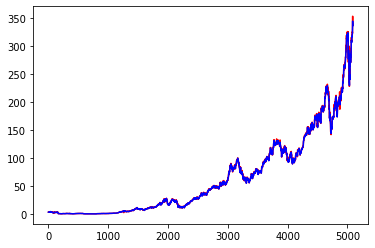

In [9]:
plt.plot(a, color='r')
plt.plot(e, color='b')

In [10]:
df2=df2.drop(df2.index[-1])
df1[['open','high','low','close']]=df2[['open','high','low','close']]

In [11]:
df1=df1.interpolate(method='akima')
df1.replace(np.inf, np.nan)
df1=df1.dropna(subset=['open', 'high', 'low', 'close'])

In [12]:
from sklearn import preprocessing
data=df1.drop(['date'],axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5089 entries, 0 to 5088
Data columns (total 15 columns):
open                     5089 non-null float64
close                    5089 non-null float64
low                      5089 non-null float64
high                     5089 non-null float64
volume                   5089 non-null int64
bb_bbm                   5089 non-null float64
bb_bbh                   5089 non-null float64
bb_bbl                   5089 non-null float64
atr                      5089 non-null float64
macd                     5089 non-null float64
cci                      5089 non-null float64
ema                      5089 non-null float64
sma12                    5089 non-null float64
sma5                     5089 non-null float64
stochastic_oscillator    5089 non-null float64
dtypes: float64(14), int64(1)
memory usage: 636.1 KB


In [15]:
scaler= preprocessing.MinMaxScaler()
scaled_df1=scaler.fit_transform(data)
scaled_df1=pd.DataFrame(scaled_df1)
scaled_df1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.009142,0.009037,0.009037,0.009142,0.0,0.008553,0.009298,0.117095,0.001709,0.645339,0.659667,0.008690,0.008720,0.008569,0.759404
1,0.009142,0.009037,0.009037,0.009142,0.0,0.008664,0.009325,0.117273,0.001657,0.645721,0.648609,0.008770,0.008778,0.008861,0.803423
2,0.008961,0.008748,0.008748,0.008961,0.0,0.008809,0.009193,0.117676,0.001605,0.646080,0.616412,0.008852,0.008789,0.009076,0.842688
3,0.008961,0.008748,0.008748,0.008961,0.0,0.008876,0.009146,0.117846,0.001584,0.645940,0.577988,0.008854,0.008776,0.009091,0.629247
4,0.009125,0.009233,0.009233,0.009125,0.0,0.008961,0.009227,0.117924,0.001590,0.646414,0.625964,0.008959,0.008829,0.009128,0.946640


In [16]:
price=scaled_df1[1]

In [17]:
values=pd.DataFrame(price.values)
dataframe=pd.concat([values.shift(1),values], axis=1)
dataframe.columns=['t-1','t+1']
corr_result=dataframe.corr()
print(corr_result)

          t-1       t+1
t-1  1.000000  0.999801
t+1  0.999801  1.000000


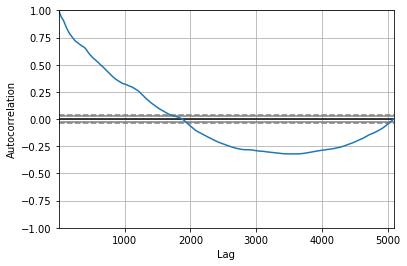

In [18]:
pd.plotting.autocorrelation_plot(price)
plt.show()

In [19]:
df4=scaled_df1.drop([1],axis=1)
df4.shape

(5089, 14)

In [20]:
#Importing the keras library to start constructing the LSTM network
from keras.models import Model, load_model, Sequential
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
from keras import backend as K
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred-y_true),axis=-1))

Using TensorFlow backend.


In [34]:
import random

In [40]:
g = df4.values
r = g.shape[0]
n_train = r*4//5
train_indices = random.sample(range(r), n_train)
test_indices = [i for i in list(range(r)) if i not in train_indices]
print(len(train_indices))
print(len(test_indices))
print(type(train_indices))

4071
1018
<class 'list'>


In [43]:
g = df4.values
n_train = g.shape[0]*4//5
exp_X_train=g[train_indices,:]
exp_X_test=g[test_indices,:]
h = price.values

In [44]:
exp_y_train=h[train_indices]
exp_y_test=h[test_indices]
print(exp_X_train.shape, exp_X_test.shape)
print(exp_y_train.shape, exp_y_test.shape)

(4071, 14) (1018, 14)
(4071,) (1018,)


In [67]:
exp_y_train

array([1.28816684e-03, 1.43902141e-03, 4.93621657e-02, ...,
       2.32439125e-01, 6.33110027e-01, 5.11520880e-04])

In [45]:
X_train= exp_X_train.reshape((exp_X_train.shape[0],1,exp_X_train.shape[1]))
X_test=exp_X_test.reshape((exp_X_test.shape[0],1,exp_X_test.shape[1]))
y_train=exp_y_train
y_test=exp_y_test
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4071, 1, 14) (1018, 1, 14) (4071,) (1018,)


In [46]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential

In [47]:
neurons=60
dropout=0.20
model1 = Sequential()
model1.add(LSTM(neurons, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), activation='sigmoid'))
model1.add(Dropout(dropout))
model1.add(LSTM(neurons*2, return_sequences=True, activation='sigmoid'))
model1.add(Dropout(dropout))
model1.add(LSTM(neurons*4, return_sequences=True, activation='sigmoid'))
model1.add(Dropout(dropout))
model1.add(LSTM(neurons, activation='sigmoid'))
model1.add(Dense(units=1))
model1.add(Activation('sigmoid'))
model1.compile(loss='mse', optimizer='adam')
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 1, 60)             18000     
_________________________________________________________________
dropout_4 (Dropout)          (None, 1, 60)             0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 1, 120)            86880     
_________________________________________________________________
dropout_5 (Dropout)          (None, 1, 120)            0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 1, 240)            346560    
_________________________________________________________________
dropout_6 (Dropout)          (None, 1, 240)            0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 60)               

In [55]:
history=model1.fit(X_train,y_train, epochs=5000, shuffle=False,batch_size=64, verbose=1)
model1.save('./models/attempt1.h5')
plt.plot(history.history['loss'], label='train')
#plt.plot(history.history['rmse'], label='test')
plt.legend()
plt.show()

Epoch 1/5000
4071/4071 [==============================] - 1s 271us/step - loss: 1.4740e-04
Epoch 2/5000
4071/4071 [==============================] - 1s 269us/step - loss: 1.6930e-04
Epoch 3/5000
4071/4071 [==============================] - 1s 238us/step - loss: 1.5674e-04
Epoch 4/5000
4071/4071 [==============================] - 1s 245us/step - loss: 1.5927e-04
Epoch 5/5000
4071/4071 [==============================] - 1s 276us/step - loss: 1.6059e-04
Epoch 6/5000
4071/4071 [==============================] - 1s 280us/step - loss: 1.5967e-04
Epoch 7/5000
4071/4071 [==============================] - 1s 249us/step - loss: 1.5437e-04
Epoch 8/5000
4071/4071 [==============================] - 1s 291us/step - loss: 1.6041e-04
Epoch 9/5000
4071/4071 [==============================] - 1s 291us/step - loss: 1.5991e-04
Epoch 10/5000
4071/4071 [==============================] - 1s 250us/step - loss: 1.5390e-04
Epoch 11/5000
4071/4071 [==============================] - 1s 267us/step - loss: 1.6879e-

KeyboardInterrupt: 

In [ ]:
pred=model1.predict(X_test)
actual= pd.DataFrame(y_test)

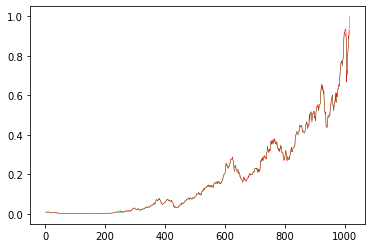

In [68]:
plt.plot(pred, color='green',linewidth=0.4)
plt.plot(actual, color='red', linewidth=0.4)
plt.savefig('./sae_prediction.png')
plt.show()

In [62]:
def mean_absolute_percentage_error(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return(mape)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [63]:
import math
mse = mean_squared_error(actual, pred)
rmse = math.sqrt(mse)
mae = mean_absolute_error(actual, pred)
mape = mean_absolute_percentage_error(actual, pred)
print("mse, rmse, mae, mape:" + str((mse,rmse,mae,mape)))

0    84.646299
dtype: float64
mse, rmse, mae, mape:(2.651359524572383e-05, 0.005149135388171865, 0.0034265110570681125, 0    84.646299
dtype: float64)
